## Overview:

### Science Question: Is it possible to predict the strength of concrete based on its parameters?

**Significance**:
Strength of concrete is one of its fundamental and critical properties to predict performance. The tests that are currently present as a standrad for the indurstry are expensive, destructive and time consuming. Predictions from current tests are a roundabout representation of the actual concrete mixes used in the field. There is an impending need for a technqiue to predict strength non-destructively which could be cheaper and faster. The modelling of the behaviour of concrete is difficult becuase of mutliple factors affecting it, which includes mix proportion, admixtures, superplastcizers added, water/cement ratio and so on. The use of AI is being done as a way to model concrete behaviour in a more effecient way. 

**Dataset Source**:
The dataset is from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

**Metric**:
Spliting of the dataset would be done into train and test data. Train data would be used for training the model to predict strength of concrete. Test data would be used to evauluate and validate the performance of the model. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cee-498-project3-forecast-strength-of-concrete/test.csv
/kaggle/input/cee-498-project3-forecast-strength-of-concrete/train.csv
/kaggle/input/cee-498-project3-forecast-strength-of-concrete/sample.csv


Lets load the train data set and see what it looks like. Importing all the libraries necessary for the above exploratory data analysis

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/cee-498-project3-forecast-strength-of-concrete/train.csv')

In [3]:
print(f"The given dataset contains {data.shape[0]} rows and {data.shape[1]} columns")
print(f"The given dataset contains {data.isna().sum().sum()} Null value")

The given dataset contains 707 rows and 9 columns
The given dataset contains 0 Null value


In [4]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847


Renaming the columns to a more convenient format

In [5]:
data.rename(columns=dict(zip(data.columns, ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'])), inplace=True)

In [6]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,707.0,280.970325,105.051424,102.000000,194.090000,275.000000,350.000000,540.000000
slag,707.0,76.519250,86.971542,0.000000,0.000000,26.000000,144.100000,359.400000
ash,707.0,51.837949,63.004123,0.000000,0.000000,0.000000,116.000000,200.000000
water,707.0,182.347709,21.844600,121.750000,164.900000,185.700000,193.000000,247.000000
superplastic,707.0,6.180854,6.029105,0.000000,0.000000,6.350000,10.300000,32.200000
coarseagg,707.0,971.419703,77.425959,801.000000,932.000000,967.080000,1028.400000,1134.300000
fineagg,707.0,772.372588,81.508478,594.000000,723.400000,779.320000,824.000000,992.600000
age,707.0,47.619519,65.464982,1.000000,14.000000,28.000000,56.000000,365.000000
strength,707.0,36.156560,16.687748,4.827711,24.023412,34.770275,46.070786,82.599225


The observations and comments that can be made from the above dataset is as follows:

1: There is no Null data

2: Apparently most of the data from cement, slag, ash, water, superplastic, coarsagg, fineaag and strength seems to be evenly distributed with lesser amounts of outliers, this is based on the fact that most of the data wihtin the 3rd inter-qartile range is slightly lower than the maximum value. 

3: The age data is having many outliers this is based on the fact that both the mean and the 3rd inter-qartile range is much lower than the maximum value.

4: The data for each of the colum is at a different scale in terms of absolute value and needs to be scaled to avoid bias in the prediction algorithm. 

# Exploratory data analysis

**Box plots**

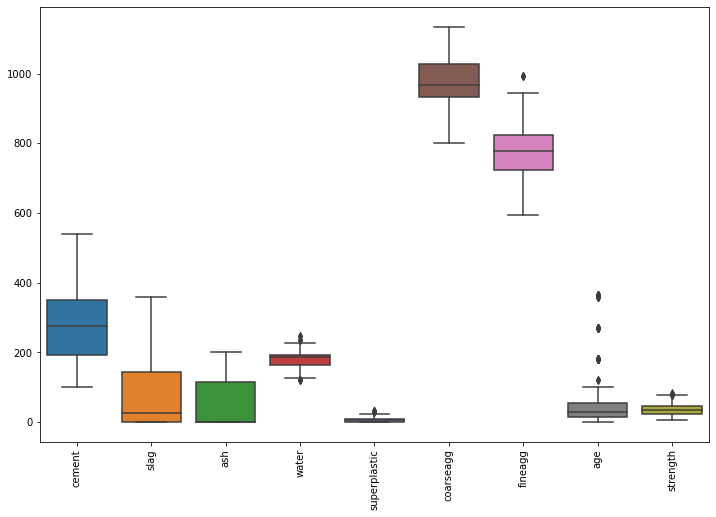

In [8]:
plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

The observations and comments that can be made from the above box plot is as follows:

1:The data in cement, slag, ash doesn't appear to have any significant outliers.

2: The data from water, superplastic, age, and strength appears to have some outliers, amidst them the age data has a long extension of the plot suggesting the highest amount of outliers amongst all of data columns mentioned.



**Distribution of independent variables**

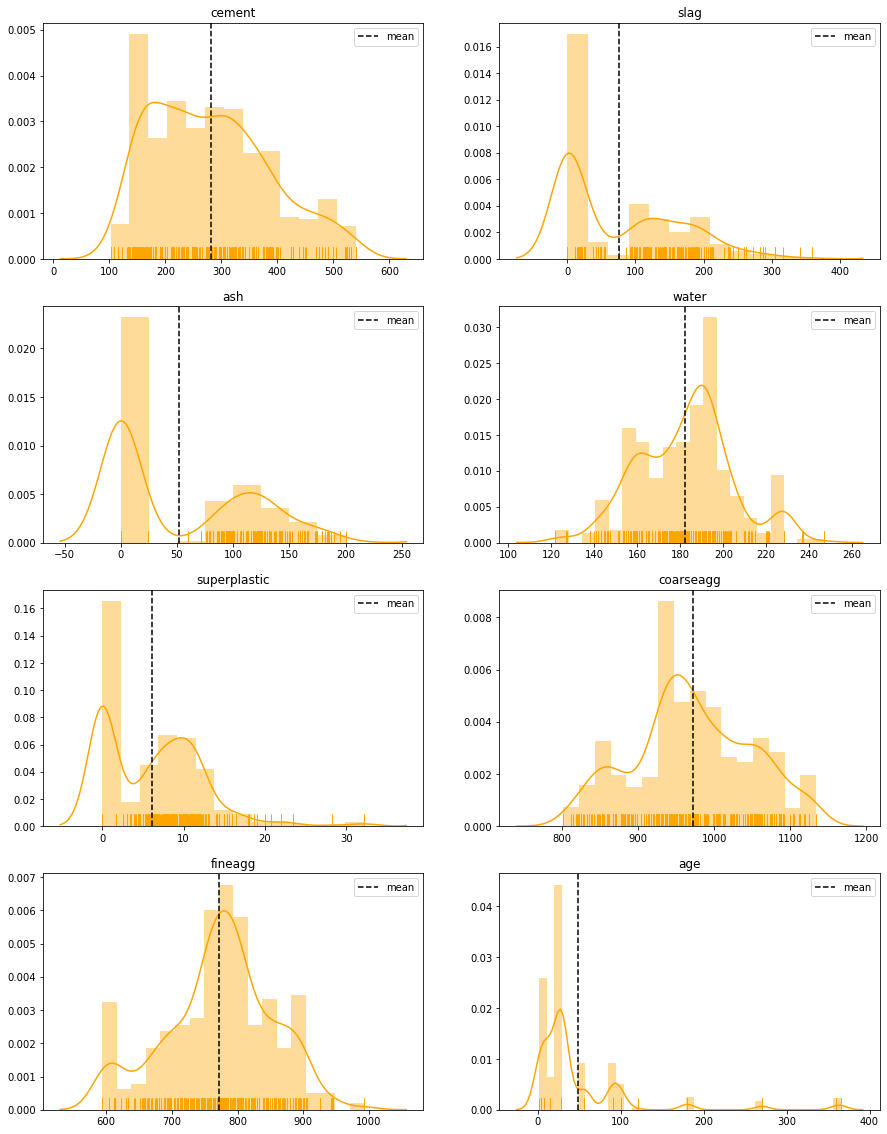

In [9]:
import itertools

cols = [i for i in data.columns if i != 'strength']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color='orange',rug=True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

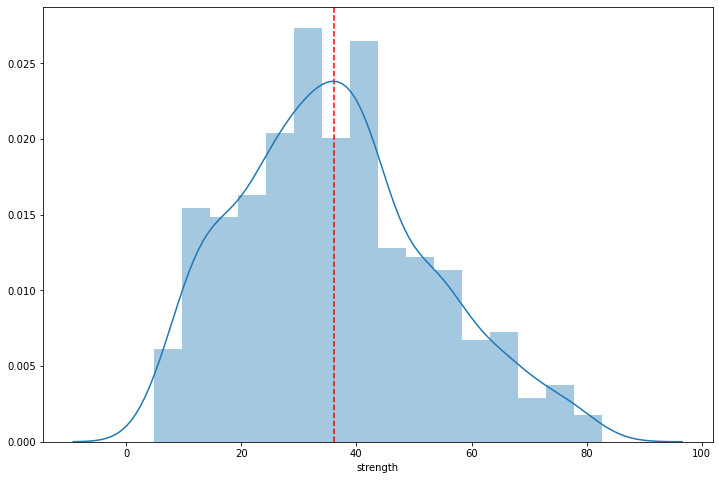

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.axvline(data.strength.mean(),linestyle="dashed",label="mean", color='red')
sns.distplot(data.strength);

**Degree of skewness**

In [11]:
from scipy.stats import skew
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
7,age,3.153869
4,superplastic,0.951027
1,slag,0.754229
2,ash,0.592097
0,cement,0.500008
8,strength,0.410593
3,water,0.089452
5,coarseagg,0.015180
6,fineagg,-0.269003


The observations and comments that can be made from the distribution plots and skewness degreee data is as follows:

1: The strength data is normally distributed.

2: Water and cement data seems to be very near to being normally distributed. 

3: The data from age column as seen from box plot had a lot of outliers which is re-affirmed here with the distribution plot having very lengthy un-symmetrical extension beyond its mean value.

**Pair plot**

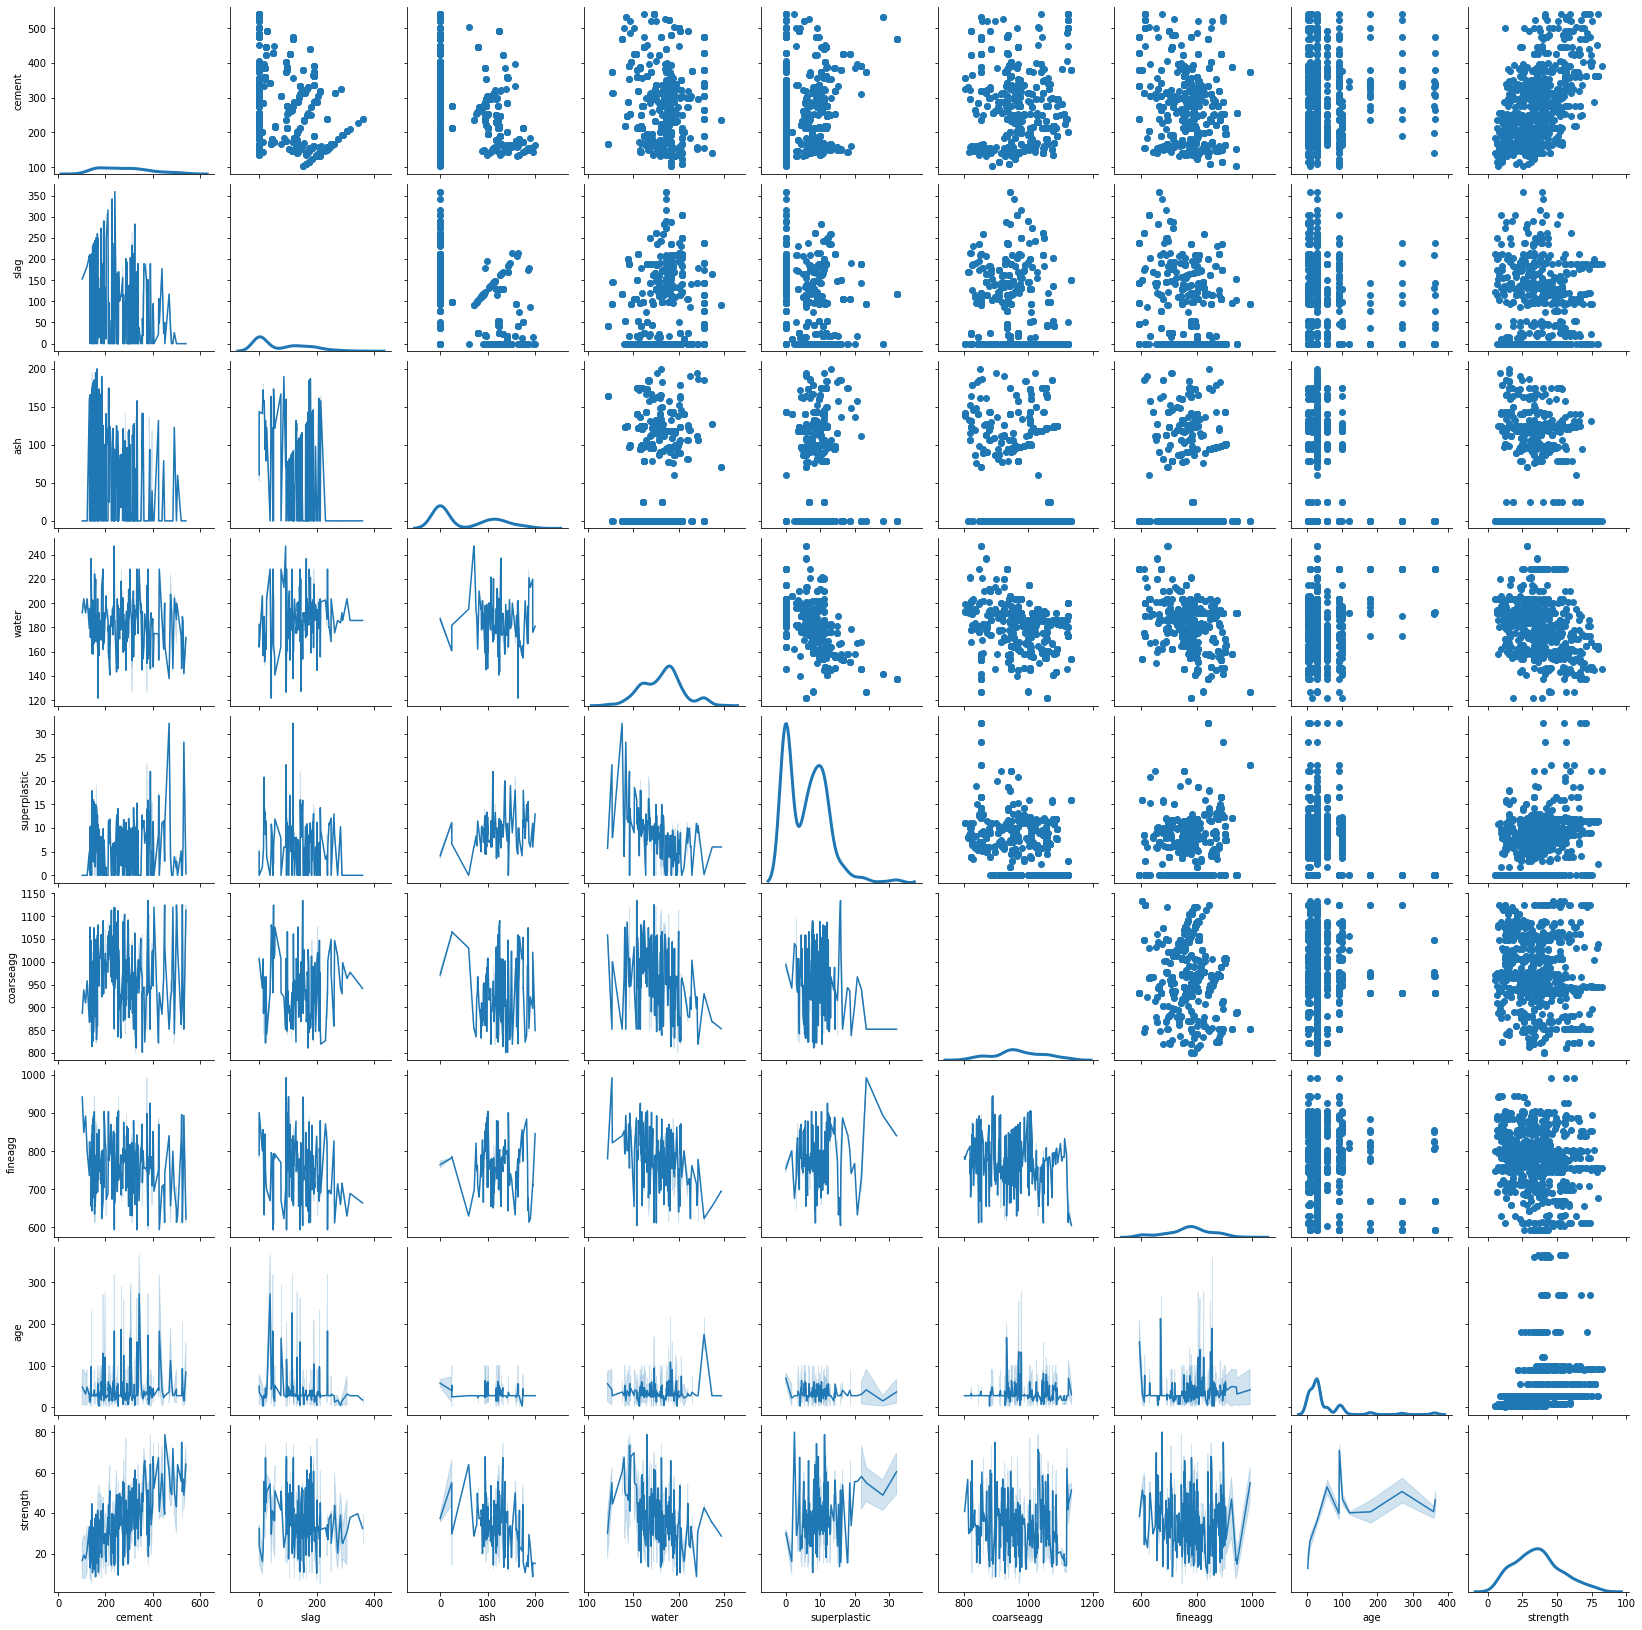

In [12]:
g = sns.PairGrid(data)
g.map_upper(plt.scatter)
g.map_lower(sns.lineplot)
g.map_diag(sns.kdeplot, lw=3, legend=True);

The observations and comments that can be made from the pair plots is as follows:

1: There is strong positive correlation between cement and strength which seems theoretically consistent.

2: In addition age also has a strong positive correlation to strength.

3: Water and strength have a negative correlation which aagain seems theoretically consistent. 

4: Water and superplastic have a negeative correlation. 

5: Slag, ash, coarseagg and fineagg are having poor correlation to strength so they aren't the best predctors of strength.

**Heat map**

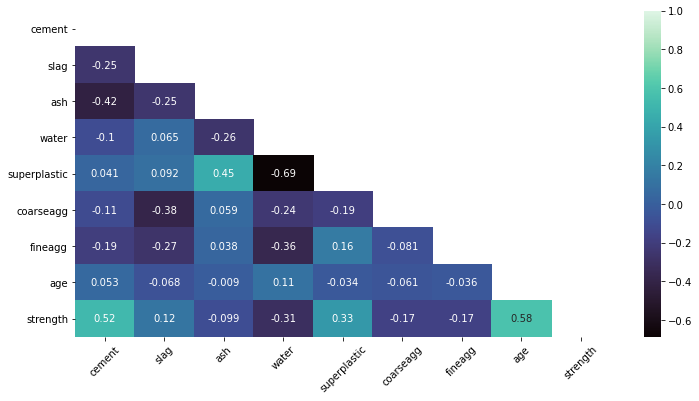

In [13]:
plt.subplots(figsize=(12, 6))
corr = data.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

The observations and comments that can be made from the heat map is as follows:

1: Cement and age have strong correlation with strength

2: Water and superplastic have strong correlation

3: Superplastic has somewhat smaller but a postive correlation with strength 

**3D graph between 3 most important features and target**

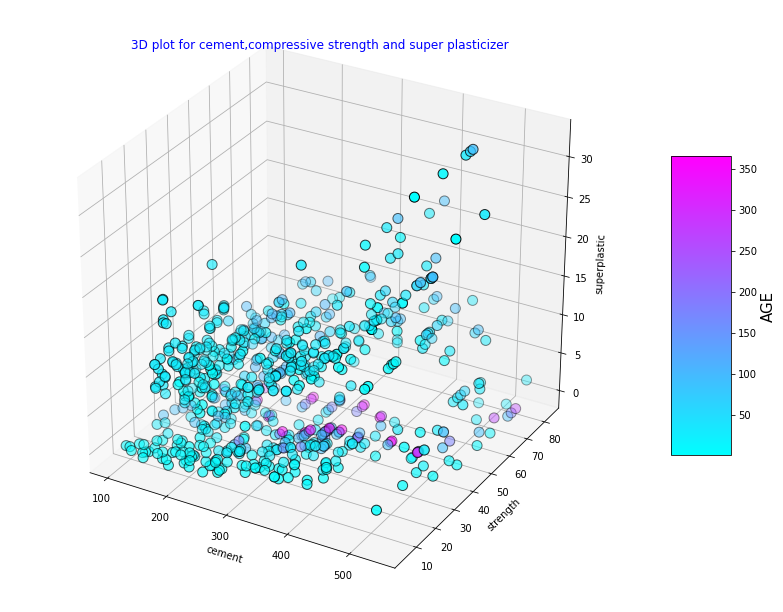

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(data["cement"],
           data["strength"],
           data["superplastic"],
           linewidth=1,edgecolor ="k",
           c=data["age"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("strength")
ax.set_zlabel("superplastic")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,compressive strength and super plasticizer",color="blue")
plt.show()

From the above analysis, it can be seen:

1: Water, superplastic, age and cement are the most important attributes for strength prediction

2: Ash, coarseagg and fineagg are not strong predictors. 
